Este código está basado en el video, por Rhett Allain (2022):
https://www.youtube.com/watch?v=mNjxr2Ht17g

# Caída libre horizontal: sin y con roce

En este código se estudiará la caída vertical con movimiento horizontal. Esto lo haremos considerando un movimiento sin roce, y luego considerando un roce no nulo, mostrando 2 ejemplos. El cálculo se hará mediante integración numérica simple, y se hará uso de notación vectorial usando el módulo numpy de python.

## Caída libre sin roce

Primero, se hará el análisis de la caída vertical con movimiento horizontal sin resistencia del aire. Este es el clásico estudio de movimiento de proyectil que se estudia en los primeros cursos de mecánica. 

En este caso, la única fuerza involucrada es la gravedad,
$$
\vec{F}_\text{total} = \vec{g} = g (-\hat{j}),
$$
donde hemos definido el eje vertical con el vector unitario $\hat{j}$ positivo hacia arriba. 

Resolveremos el problema de encontrar la posición en función del tiempo con una integración numérica simple, como se hizo en el código video-integración.ipynb. Además, se usará el paquete numpy para poder hacerlo de manera vectorial, de manera de condensar los cálculos de ambos ejes.

In [1]:
import numpy as np                #Se importan los módulos que usaremos 
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#Se definen las condiciones iniciales de integración.

g = np.array([0, -9.8])  # Acá ocupamos en comando array del paquete numpy para escribir la gravedad como un vector

h = 25      # Altura inicial, en metros 
v0 = 4      # Velocidad ohrizontal inicial, en m/s
M = 0.04    # Masa del cuerpo, en kg
    




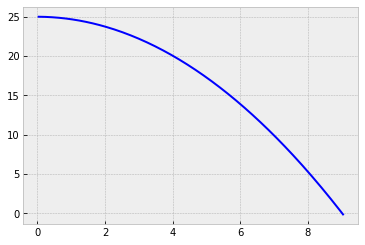

In [3]:
x1 = np.array([0, h])    # Posición inicial, escrita en forma vectoial
v1 = np.array([v0, 0])   # Velocidad inicial, es forma vectorial

t = 0              # Tiempo inicial en segundos
Dt = 0.01          # Intervalo de tiempo, en segundos

x1_array = []      # Inicializamos las variables que almacenarán los resultado  en forma de arreglo, para ser graficados.
y1_array = []      # las posiciones en x y en y por separado

while x1[1] > 0:   # Control del cálculo. El cálculo se realiza en ciclos, mientras que la coordenada y sea positiva, hasta que el cuerpo llegue al suelo     
    F = M*g        # Fuerza involucrada, que corresponde sólo a la de gravedad

    #Se hace el cálculo, antualizando las variables de velocidad, posición y tiempo.
    v1 = v1 + F*Dt/M   
    x1 = x1 + v1*Dt
    t = t + Dt
    x1_array.append(x1[0])   # Guardamos el resultado del eje x
    y1_array.append(x1[1])   # Guardamos el resultado del eje y

    #plt.scatter(x1[0], x1[1], marker='x', c='blue', s=10)  # Markers más chicos (cirulos o puntitos)

plt.plot(x1_array, y1_array, c='blue') #marker = 'o-' 
#Labels


## Roce lineal

El primer caso de roce que analizaremos es en el que el aire ejerce una resistencia proporcional a la velocidad, es decir, un roce lineal. Esto es,
$$
\vec{F_r} = -b \vec{v},
$$
donde la fuerza es proporcional a la velocidad y con sentido opuesto a ella, y $b$ es una constante de proporcionalidad que depende de las propiedades del medio, e.g. el aire, y de la forma del cuerpo en estudio, y tiene unidades de fuerza/velocidad, Ns/m. De esta manera, la fuerza total es 
$$
\vec{F}_\text{total} = \vec{g} + \vec{F}_r = g (-\hat{j}) - b \vec{v}.
$$
Para este ejemplo, se usará que $b = 0.1$ Ns/m.

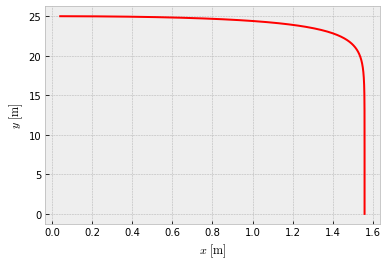

In [4]:
b = 0.1                   # La constante de proporcionalidad de la fuerza
  
x2 = np.array([0, h])     # Posición inicial, escrita en forma vectoial
v2 = np.array([v0, 0])    # Velocidad inicial, es forma vectorial

t = 0              # Tiempo inicial en segundos
Dt = 0.01          # Intervalo de tiempo, en segundos
 
x2_array = []   
y2_array = []

while x2[1] > 0:  
    F = M*g - b*v2       # Fuerza involucrada, la gravedad más la resistencia lineal del aire
    v2 = v2 + F*Dt/M  
    x2 = x2 + v2*Dt
    t = t + Dt
    x2_array.append(x2[0])
    y2_array.append(x2[1])

    #plt.scatter(x2[0], x2[1], marker='+', c='blue')

plt.plot(x2_array, y2_array, c='red') 
plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
plt.xlabel('$x\ \\rm [m]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
plt.ylabel('$y\ \\rm [m]$') # Etiqueta del eje y
#plt.savefig('x_vs_t.png')
plt.show()

## Roce cuadrático
En este segundo caso, el aire ejerce una resistencia proporcional al cuadrado de la velocidad, es decir, estamos considerando un roce cuadrático.
$$
\vec{F}_r = - C |v|^2 \hat{v}     
$$
es decir, la fuerza de roce es igual a un coeficiente de roce $C$ (que similarmente al caso anterior depende de las propiedades del medio y de la forma del cuerpo en movimiento, y con unidades de $Ns^2/m^2$) por la magnitud de la velocidad al cuadrado por el vector unitario que apunta en la dirección de la velocidad, con un signo menos delante para cuantificar que la fuerza de roce se opone al movimiento.

En general, es muy probable que se tenga una combinación de ambas resistencias, lineal y cuadrática. En este caso las analizaremos por separado, como si existiera sólo una de ellas, para simplificar el análisis.

Notar que 
$$
|v|^2 \hat{v} = (|v|\hat{v})|v| = \vec{v}|v|.  \qquad  (1)
$$
Esto lo usaremos en el código.

Para este ejemplo, se usará que $C = 0.1$ $Ns^2/m^2$.

In [5]:
vt = np.array([v0, -2*v0])
np.sqrt(np.sum(vt*vt))*vt 

array([ 35.77708764, -71.55417528])

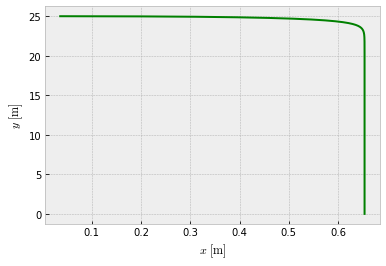

In [6]:
C = 0.1                    # La constante de proporcionalidad de la fuerza, en Ns^2/m^2

x3   = np.array([0, h]) 
v3 = np.array([v0, 0])

t = 0
Dt = 0.01

x3_array = []
y3_array = []

while x3[1] > 0:
    F = M*g - C*v3*np.sqrt(np.sum(v3*v3))   # Fuerza involucrada, la gravedad más la resistencia cuadrática del aire.  
                                    # En este caso, la fuerza se modela en el código como el vector velocidad multiplicado
                                    # por su módulo, como se mostró en (1).
                                    # En este caso, np.sqrt(np.sum(v3*v3)) corresponde al módulo del vector v3
    
    v3 = v3 + F*Dt/M
    x3 = x3 + v3*Dt
    t = t + Dt
    x3_array.append(x3[0])
    y3_array.append(x3[1])

    #plt.scatter(x3[0], x3[1], marker='+', c='blue')

plt.plot(x3_array, y3_array, c='green') 
plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
plt.xlabel('$x\ \\rm [m]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
plt.ylabel('$y\ \\rm [m]$') # Etiqueta del eje y
#plt.savefig('x_vs_t.png')
plt.show()

En la siguente celda, se mostrarán los 3 ejemplos en el mismo gráfico, para poder compararlos.

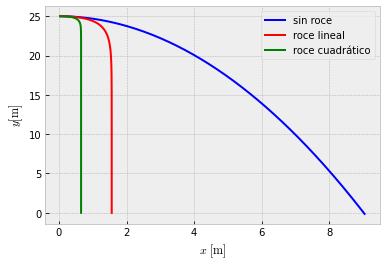

In [7]:
plt.plot(x1_array, y1_array, c='blue', label='sin roce') #, marker='+')     # Se grafica la diferencia entre las soluciones analítica y numérica
plt.plot(x2_array, y2_array, c='red', label='roce lineal') #, marker='+')       
plt.plot(x3_array, y3_array, c='green', label='roce cuadrático') #, marker='+')

plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
plt.xlabel('$x\ \\rm [m]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
plt.ylabel('$y \\rm [m]$') # Etiqueta del eje y
#plt.savefig('x_vs_t.png')
plt.legend()                # Con este comando se agrega al gráfico las legendas de cada valor graficado
plt.show()


## Versión interactiva

Finalmente, se presentará una versión del código completa que funciona de manera interactiva, en el cual podemos modificar los distintos parámetros del cálculo para ver cómo varía el resultado con el cambio del valor de las variables.

In [8]:
from ipywidgets import interact    # Importamos la función interact del paquete ipywidgets, que usaremos para hacer
                                   # los gráficos interactivos

In [9]:
# Para que la función interact funcione, se debe definir todo lo que se va a modificar como una función

def graf_interact(h, v0, b, C):  # Encabezado de la función. los valores que queremos que cambien serán 
                                 # los argumentos de la función.
                                 # En este caso, serán la altura h, la velocidad horizontal inicial v0,
                                 # el coeficiente de roce lineal b y el coeficiende de roce cuadrático C

    # Acá van toas las líneas necesarias para implementar el gráfico con los 3 roces diferentes.
                                                                
    x1 = np.array([0, h])    # Posición inicial, escrita en forma vectoial
    v1 = np.array([v0, 0])   # Velocidad inicial, es forma vectorial

    t = 0              # Tiempo inicial en segundos
    Dt = 0.01          # Intervalo de tiempo, en segundos

    x1_array = []      # Inicializamos las variables que almacenarán los resultado  en forma de arreglo, para ser graficados.
    y1_array = []      # las posiciones en x y en y por separado

    while x1[1] > 0:   # Control del cálculo. El cálculo se realiza en ciclos, mientras que la coordenada y sea positiva, hasta que el cuerpo llegue al suelo     
        F = M*g        # Fuerza involucrada, que corresponde sólo a la de gravedad

        #Se hace el cálculo, antualizando las variables de velocidad, posición y tiempo.
        v1 = v1 + F*Dt/M   
        x1 = x1 + v1*Dt
        t = t + Dt
        x1_array.append(x1[0])   # Guardamos el resultado del eje x
        y1_array.append(x1[1])   # Guardamos el resultado del eje y

  
    x2 = np.array([0, h])     # Posición inicial, escrita en forma vectoial
    v2 = np.array([v0, 0])    # Velocidad inicial, es forma vectorial

    t = 0              # Tiempo inicial en segundos
    Dt = 0.01          # Intervalo de tiempo, en segundos
    
    x2_array = []   
    y2_array = []

    while x2[1] > 0:  
        F = M*g - b*v2       # Fuerza involucrada, la gravedad más la resistencia lineal del aire
        v2 = v2 + F*Dt/M  
        x2 = x2 + v2*Dt
        t = t + Dt
        x2_array.append(x2[0])
        y2_array.append(x2[1])


    x3   = np.array([0, h]) 
    v3 = np.array([v0, 0])

    t = 0
    Dt = 0.01

    x3_array = []
    y3_array = []

    while x3[1] > 0:
        F = M*g - C*v3*np.sqrt(np.sum(v3*v3))   # Fuerza involucrada, la gravedad más la resistencia cuadrática del aire.  
                                        # En este caso, la fuerza se modela en el código como el vector velocidad multiplicado
                                        # por su módulo, como se mostró en (1).
                                        # En este caso, np.sqrt(np.sum(v3*v3)) corresponde al módulo del vector v3
        
        v3 = v3 + F*Dt/M
        x3 = x3 + v3*Dt
        t = t + Dt
        x3_array.append(x3[0])
        y3_array.append(x3[1])

    plt.plot(x1_array, y1_array, c='blue', label='sin roce') #, marker='+')     # Se grafica la diferencia entre las soluciones analítica y numérica
    plt.plot(x2_array, y2_array, c='red', label='roce lineal, b = '+str(b)) #, marker='+')       
    plt.plot(x3_array, y3_array, c='green', label='roce cuadrático, C = '+str(C)) #, marker='+')

    plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
    plt.xlabel('$x\ \\rm [m]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
    plt.ylabel('$y\ \\rm [m]$') # Etiqueta del eje y
    #plt.savefig('x_vs_t.png')
    plt.ylim(0,32)
    plt.xlim(0,25)
    plt.legend()                # Con este comando se agrega al gráfico las legendas de cada valor graficado
    plt.show()

In [10]:
# Implementamos la función interact.
# Los argumentos de la función interact son la función que produce el gráfico que queremos mostrar de manera interactiva,
# y las variables interactivas, que corresponden a los argumentos de la función que grafica.
# Las variables interactivas se programan incluyendo el nombre de la variable y su rango, escrito como (mínimo, máximo, paso).
# En la salida aparecen las variables interacticas con un slider para cada una

interact(graf_interact, h=(20, 30, 1), v0=(6,10,0.5), b=(0,0.1, 0.01), C=(0,0.02, 0.002))

interactive(children=(IntSlider(value=25, description='h', max=30, min=20), FloatSlider(value=8.0, description…

<function __main__.graf_interact(h, v0, b, C)>